# Multiple Linear Regression with Variable Selection
----   
In this tutorial, we will learn how to do some basic variable selection to improve the accuracy of a multiple variable linear regression model.

## Getting started
Same as before, we will need to import a few Python libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Next** we will load our data as a Pandas DataFrame.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/James-Leslie/Learning-Library/master/Regression-methods/1_Linear_Regression/data/data_2.csv', index_col=0)
df.head()

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
2008M01,7.01,5611.90,39356.82,8105.11,56841.94,29884.51,1.92,29526.78,51547.61,37752.29,11.0,10.64,10.47,4.53,10.83,14.5,8.36,312.97,86.03,85.48
2008M02,7.66,6126.16,46946.33,8159.43,62527.78,30304.31,2.01,29943.04,59702.31,45927.67,11.0,10.66,10.32,5.61,11.00,14.5,8.69,335.09,87.23,85.91
2008M03,7.97,6417.48,51150.89,8010.87,63851.12,30615.42,2.05,30246.54,56448.18,42565.17,11.0,10.69,10.18,5.62,11.04,14.5,9.16,348.84,89.00,87.04
2008M04,7.79,7215.71,56174.34,9112.97,70944.49,30763.42,2.03,30399.21,55534.75,43342.70,11.5,11.00,10.27,5.80,11.28,15.0,9.15,358.47,90.83,87.61
2008M05,7.62,7379.67,56240.45,9090.14,69275.97,30831.43,2.10,30467.81,57682.89,46533.13,11.5,11.20,10.60,6.50,11.39,15.0,9.51,371.98,95.32,88.32


In [3]:
df.shape

(120, 20)

## Variable Selection
We have 19 predictor variables to choose from, so we need a way of guiding us to choose the best ones to be our predictors. One way is to look at the correlations between all variables in our DataFrame.

In [4]:
# show correlations between predictor variables and the response variable
df.corr()['ZAR/USD'].sort_values(ascending=False)

ZAR/USD                                    1.000000
Consumer Price Index                       0.872660
Producer Price Index                       0.863282
IMF Reserve Position (USD)                 0.855311
Value of Imports (ZAR)                     0.791994
Value of Exports (ZAR)                     0.784756
Foreign Exchange (USD)                     0.317203
Total Reserves excl Gold (USD)             0.308049
Government Bonds                           0.191455
Financial Market Prices, Equities Index    0.139858
Savings Rate                               0.041555
Treasury Bill Rate                         0.034169
Money Market Rate                         -0.030787
Deposit Rate                              -0.034278
Central Bank Policy Rate                  -0.056806
Lending Rate                              -0.056806
Value of Exports (USD)                    -0.335780
Value of Imports (USD)                    -0.350606
Liabilities to Non-residents (USD)        -0.472230
Claims on No

## Correlations
The column above shows a single column from the correlation matrix. Specifically, it shows the correlations between all predictor variables and the target variable. We can see that Consumer Price Index, Producer Price Index and the IMF Reserve Position correlate quite strongly with the target variable.

However, we also need to look for predictor variable pairs which have a high correlation with eachother.   

In [5]:
corr = df.corr()  # create correlation matrix
corr[corr > 0.96]  # show correlation coefficients > 0.9

,ZAR/USD,Value of Exports (USD),Value of Exports (ZAR),Value of Imports (USD),Value of Imports (ZAR),Total Reserves excl Gold (USD),IMF Reserve Position (USD),Foreign Exchange (USD),Claims on Non-residents (USD),Liabilities to Non-residents (USD),Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Savings Rate,Deposit Rate,Lending Rate,Government Bonds,"Financial Market Prices, Equities Index",Producer Price Index,Consumer Price Index
ZAR/USD,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value of Exports (USD),NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value of Exports (ZAR),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value of Imports (USD),NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value of Imports (ZAR),NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Reserves excl Gold (USD),NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.994116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMF Reserve Position (USD),NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Foreign Exchange (USD),NaN,NaN,NaN,NaN,NaN,0.994116,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claims on Non-residents (USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Liabilities to Non-residents (USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Okay, this might seem like a lot to take in!   

The correlation matrix above is a symmetric matrix showing correlations between variables. What we need to do is simply find cells with values greater than 0.9 in the matrix and then match the row and the column names to find correlated pairs.

It looks like **Foreign Exchange** and **Total Reserves excl Gold** are highly correlated. **Producer Price Index** and **Consumer Price Index** are also highly correlated too.   

Let's plot a smaller correlation matrix using just these variables.

In [6]:
df[['Foreign Exchange (USD)',
   'Total Reserves excl Gold (USD)',
   'Consumer Price Index',
   'Producer Price Index']].corr()

,Foreign Exchange (USD),Total Reserves excl Gold (USD),Consumer Price Index,Producer Price Index
Foreign Exchange (USD),1.000000,0.994116,0.662314,0.700600
Total Reserves excl Gold (USD),0.994116,1.000000,0.663697,0.692428
Consumer Price Index,0.662314,0.663697,1.000000,0.987164
Producer Price Index,0.700600,0.692428,0.987164,1.000000


Above, we can see that we do have some highly correlated predictors!   

In each of the two correlated pairs, we'll drop the one which has the lower correlation with the ZAR/USD exchange rate.

In [7]:
df = df.drop(['Total Reserves excl Gold (USD)',
              'Producer Price Index'], axis=1)

In addition to the two pairs above, we also seem to have some strong correlations between many of the `Rates` columns.

In [8]:
df[['Central Bank Policy Rate',
   'Money Market Rate',
   'Treasury Bill Rate',
   'Deposit Rate',
   'Lending Rate']].corr()

,Central Bank Policy Rate,Money Market Rate,Treasury Bill Rate,Deposit Rate,Lending Rate
Central Bank Policy Rate,1.000000,0.996489,0.986698,0.994102,1.000000
Money Market Rate,0.996489,1.000000,0.988692,0.996987,0.996489
Treasury Bill Rate,0.986698,0.988692,1.000000,0.987102,0.986698
Deposit Rate,0.994102,0.996987,0.987102,1.000000,0.994102
Lending Rate,1.000000,0.996489,0.986698,0.994102,1.000000


Of all of the `Rates` variables, `Lending Rate` has the strongest correlation with the target variable, so we will drop all other `Rates` variables.

In [9]:
df = df.drop(['Central Bank Policy Rate',
              'Money Market Rate',
              'Treasury Bill Rate',
              'Deposit Rate'], axis=1)

## Let's try to model the Rand exchange rate   

Now that we have thinned out our DataFrame, let's see if we can fit a better model than we did in all the previous tutorials.   
   

In [10]:
from sklearn.linear_model import LinearRegression

X = df.drop('ZAR/USD', axis=1)
y = df['ZAR/USD']

In [11]:
lm = LinearRegression()

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    shuffle=False)

In [14]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
b = float(lm.intercept_)

In [16]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [17]:
print("Intercept:", float(b))

Intercept: -1.2414061608564317


In [18]:
coeff

,Coefficient
Value of Exports (USD),-0.000517
Value of Exports (ZAR),0.000065
Value of Imports (USD),-0.000642
Value of Imports (ZAR),0.000059
IMF Reserve Position (USD),-0.002861
Foreign Exchange (USD),0.000060
Claims on Non-residents (USD),0.000017
Liabilities to Non-residents (USD),-0.000001
Savings Rate,-0.197400
Lending Rate,0.380276


## Assess the accuracy of the model
In the previous tutorial, using all predictor variables, we achieved mean squared error values of 0.0326 and 1.6836 on the training and test sets respectively.

Let's see how our new model performed!

In [19]:
from sklearn import metrics

In [20]:
train_lm = lm.predict(X_train)

print('MSE (train)')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))

MSE (train)
Linear: 0.034850509089144686


In [21]:
test_lm = lm.predict(X_test)

print('MSE (test)')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))

MSE (test)
Linear: 1.2766295190540335


We can see from the results that we have managed to improve our model by using fewer predictors. Sometimes, it would seem less really *is* more.   

It's interesting to note that our training MSE actually increased when compared to the model we used in the previous tutorial. This is a sign that our model was overfitting the data previously, and our current model has a better capacity for generalising to new data.

## Data visualisation

In [22]:
# we want to plot the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[0], index=['2016M01']))

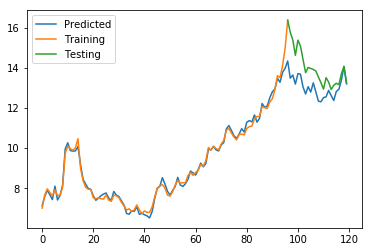

In [23]:
plt.plot(np.arange(len(y)), lm.predict(X), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

----
**To summarise:**   
We learnt how to:
* perform manual variable selection using correlations between variables.

In future tutorials, we will look at methods for improved variable selection.